<div style="color: green; font-weight: bold">You basically realize the implement of weight matrix.But what you didn't take into consideration is that when the ray not hits the center of one unit, the intensity should be divided and absorbed by two units. Which means the weights of both units will change. </div>

1
2
3


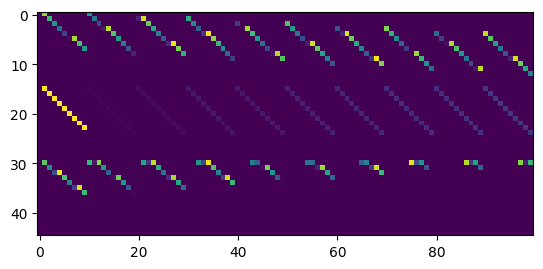

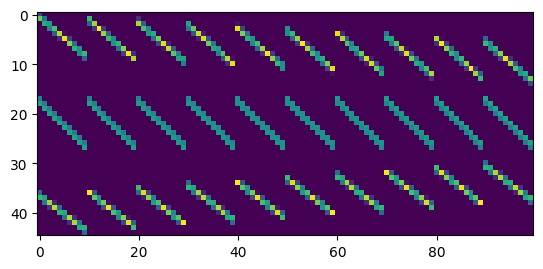

In [16]:
from scipy.sparse import coo_matrix 
import numpy as np
import matplotlib.pyplot as plt

X_ex = np.load('hs_tomography/X_example.npy')

#M is the width of the image
#alphas are the different angles
#Np is the resolution of the sensor
#X = bins(Np) x size of alphas x D
def construct_X(M, alphas, Np = 1):
    C = np.array([])
    for x in range(0, M * M):
        C = np.append(C, np.array([x % M, x // M]))
        
    C = np.split(C, M * M)
    Test = np.zeros((M,M))
    xs = np.array([])
    ys = np.array([])
    weights = np.array([])
    angle_count = 0
    for angle in alphas:
        
        n = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle))])
        rotated_sensor_1 = np.array([((-M / 2) * n[0] - (-M / 2) * n[1]) + M/2, ((-M / 2) * n[0] + (-M / 2) * n[1])+ M/2])

        #print(sensor)
        for x in range(0, M):
            for y in range(0,M):
                v = np.dot(n, np.array([x,y]))
                sensor_id =  np.trunc(v)
                if 0 <= sensor_id < Np:
                    xs = np.append(xs, angle_count * Np + sensor_id)
                    ys = np.append(ys, x + y * M)
                    weights = np.append(weights, np.absolute(v - sensor_id))

        angle_count += 1
        print(angle_count)
    
        
    return coo_matrix((weights,(xs,ys)),(len(alphas) * Np , M * M)).toarray()

#y is the intensity of the sensor for all angles
x = construct_X(10, [33,1,-42], 15)
plt.imshow(x)
plt.figure("2")
plt.imshow(X_ex)
    

<div style="color: green; font-weight: bold">It is great that you visualized the small example. And it is right! But the professor requires us to visualize both example and calculate the sparsity, which you can implement via nnz method to calculate the rario of the number of non-zero elements to the number of all elements.After that you can diagnose why H.S. has a headache. </div>

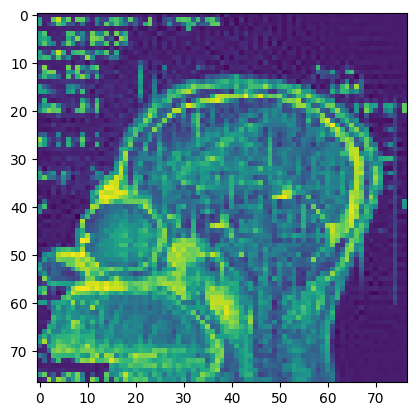

In [14]:
from scipy.sparse.linalg import lsqr
import scipy
import matplotlib.pyplot as plt
import numpy as np


X = np.load('hs_tomography/X_77.npy', allow_pickle=True)
X = scipy.sparse.csc_matrix(X.all())
y = np.load('hs_tomography/y_77.npy')
x, istop, itn, normr = lsqr(X,y, atol=0.00001, btol=0.00001)[:4]
x = np.split(You, 77)
plt.imshow(x)


In [15]:
print(len(X.nonzero()[0]))

1066978


<div>Remove angles as long the picture is still recognizable.</div>

<div style="color: green; font-weight: bold">For the minimizing the radiation dose part, you can use the previous approach to reconstruct the image.The task is to figure out how many projections we should use so we can get a clear enough picture. You can set a parameter list which contains differents numbers of projections and use them to reconstruct the image and see the effect. </div>